# PART II - Programming Exercises
#####  @ Haim Goldfisher

# Question 1 :

In [19]:
# this function gets a decimal number (10) , it prints that number binary(2), octal(8) and hexadecimal(16) bases as well.

def decimalToBinary(a): # this function gets a decimal number (10) , it returns that number in binary(2) base.
    if a < 0:
        num = int(a*-1)
    else:
        num = int(a)
    newNum = 0
    power = 0
    while(num != 0):
        newNum += (int(num) % 2) * (int(pow(10,power)))
        power += 1
        num /= 2
    if a < 0:
        return int(-1*newNum)
    return int(newNum)

def decimalToOctal(a): # this function gets a decimal number (10) , it returns that number in octal(8) base.
    if a < 0:
        num = int(a*-1)
    else:
        num = int(a)
    newNum = 0
    power = 0
    while(num != 0):
        newNum += (int(num) % 8) * (int(pow(10,power)))
        power += 1
        num /= 8
    if a < 0:
        return int(-1*newNum)
    return int(newNum)

def decimalToHex(a): # this function gets a decimal number (10) , returns prints that number in hexadecimal(16) base.
    if a < 0:
        num = int(a*-1)
    else:
        num = int(a)
    newNum = ""
    while num > 0:
        remainder = num % 16
        if remainder == 10:
            newNum = "A" + newNum
        elif remainder == 11:
            newNum = "B" + newNum
        elif remainder == 12:
            newNum = "C" + newNum
        elif remainder == 13:
            newNum = "D" + newNum
        elif remainder == 14:
            newNum = "E" + newNum
        elif remainder == 15:
            newNum = "F" + newNum
        else:    
            newNum = str(remainder) + newNum
        num = num // 16
    if a < 0:
        return "-"+newNum
    return newNum

def basesForDecimalNum(num): # the main function, it gets required number and prints it in the other bases.
    print ("The results for the decimal number: ",num,"\n")
    print ("For Binary base:                    ",decimalToBinary(num))
    print ("For Octal base:                     ",decimalToOctal(num))
    print ("For Hexadecimal base:               ",decimalToHex(num))

Here's a simple example of using of the function, try it by yourself!

In [16]:
basesForDecimalNum(int(input("Enter a decimal number for conversion: "))) # Press Ctrl+Enter to try it.

Enter a decimal number for conversion: 2332
The results for the decimal number:  2332 

For Binary base:                     100100011100
For Octal base:                      4434
For Hexadecimal base:                91C


# Question 2 :

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### DATASET

In [4]:
cast = pd.read_csv('C:\Haim\Anaconda\cast.csv')
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


# 1.

How many movies have the title "Hamlet"?

In [5]:
hamlet = cast.loc[cast['title']=='Hamlet']
hamlet = hamlet.drop_duplicates(subset = 'year', keep = 'first')
result = hamlet.shape[0]
print("The number of movies which have the title `Hamlet` is:",result)

The number of movies which have the title `Hamlet` is: 17


# 2.

List all of the "Treasure Island" movies from earliest to most recent.

In [6]:
titleTI = cast.loc[cast['title'] == 'Treasure Island']
 # deleting duplicates from the same year:
titleTI = titleTI.drop_duplicates(subset = 'year', keep = 'first')
titleTI.sort_values(by = ['year'])

,title,year,name,type,character,n
313097,Treasure Island,1918,Francis Carpenter,actor,Jim Hawkins,1.0
345942,Treasure Island,1920,Lon Chaney,actor,Blind Pew,5.0
8570,Treasure Island,1934,Robert Adair,actor,Tom - Seaman,NaN
12141,Treasure Island,1950,Chris Adcock,actor,Pike,26.0
38151,Treasure Island,1972,Cristino Almod?var,actor,O'Brien,18.0
484325,Treasure Island,1973,Richard Dawson,actor,Long John Silver,1.0
14899,Treasure Island,1985,Yves Afonso,actor,French captain,8.0
104905,Treasure Island,1999,Lance (II) Baker,actor,Frank,1.0


# 3.

How many roles were credited in the silent 1921 version of Hamlet?

In [7]:
hamletV = cast.loc[cast['title'] == 'Hamlet']
hamletIn1921 = hamletV.loc[cast['year'] == 1921]
print ("The number of roles which credited in the silent 1921 version of Hamlet is:",len(hamletIn1921),".")

The number of roles which credited in the silent 1921 version of Hamlet is: 9 .


# 4.

Use groupby() to plot the number of "Hamlet" films made each decade

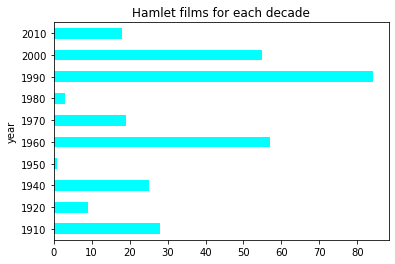

In [36]:
ham = cast.loc[cast['title']=='Hamlet']
gruop_ham = ham.groupby((ham['year']//10)*10).size()
gruop_ham.plot(title = "Hamlet films for each decade", kind='barh', color='cyan')

# 5.

How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [21]:
act = cast[cast.year // 10 == 195]
act = act[act.n == 1]
act.groupby(['year', 'type']).size()

year  type   
1950  actor      604
      actress    271
1951  actor      633
      actress    272
1952  actor      591
      actress    284
1953  actor      634
      actress    290
1954  actor      626
      actress    298
1955  actor      606
      actress    264
1956  actor      614
      actress    288
1957  actor      708
      actress    284
1958  actor      694
      actress    275
1959  actor      678
      actress    287
dtype: int64

# 6.

How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [34]:
n_num=cast[(cast.year>=1990)&(cast.n==1)]
n_num=n_num.groupby('name').size().sort_values()
n_num_df=n_num.to_frame().rename(columns={0:'roles'}).reset_index()
print(n_num_df.sort_values(by=['roles'],ascending=False).head(10))

                     name  roles
36067            Mohanlal    126
36066           Mammootty    118
36065        Akshay Kumar     87
36064             Jayaram     76
36063            Andy Lau     72
36062          Ajay Devgn     69
36061        Eric Roberts     68
36060    Amitabh Bachchan     68
36059  Nagarjuna Akkineni     60
36058               Dilip     59


# 7.

List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [12]:
frankOz = cast[cast.name == "Frank Oz"]
frankOz = frankOz.groupby(['title', 'year']).size()
frankOz = frankOz[frankOz > 1]
frankOz.sort_index(level=['year'])

title                                     year
The Muppet Movie                          1979    8
An American Werewolf in London            1981    2
The Great Muppet Caper                    1981    6
The Dark Crystal                          1982    2
The Muppets Take Manhattan                1984    7
Sesame Street Presents: Follow that Bird  1985    3
The Muppet Christmas Carol                1992    7
Muppet Treasure Island                    1996    4
Muppets from Space                        1999    4
The Adventures of Elmo in Grouchland      1999    3
dtype: int64